# Работа с последовательностями. Рекуррентные нейросети

##Последовательности и нейросети для работы с ними

**Последовательные данные** встречаются повсюду. Нас окружают предложения на естественном языке, временные ряды, биологические последовательности и музыкальные мелодии. Главная **особенность** таких данных заключается в том, что значение в позиции зависит от значений в окружающих позициях.

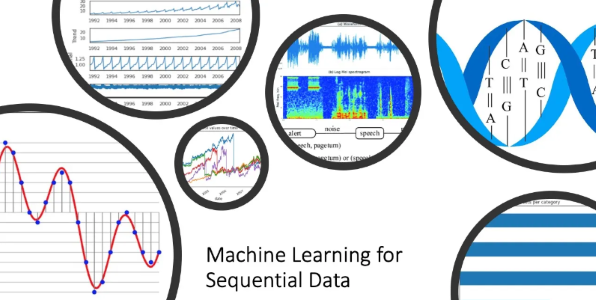

**Рекуррентные нейросети** — это семейство архитектур, специально созданных для работы с последовательностями.

##RNN

###Архитектура RNN

**Рекурентные нейросети** были предложены в 1980-х годах и берут своё начало в работах **Джона Хопфилда** и **Джерри Брукса**. Базовая рекуррентная сеть $(Recurrent\ Neural\ Network,\ RNN)$  обрабатывает данные, представленные в виде **последовательного** набора однотипных элементов. Например, это значения температуры (числа) за каждый час в заданный день или значения, снимаемые датчиком, как в примере из лекции по введению в нейронные сети.

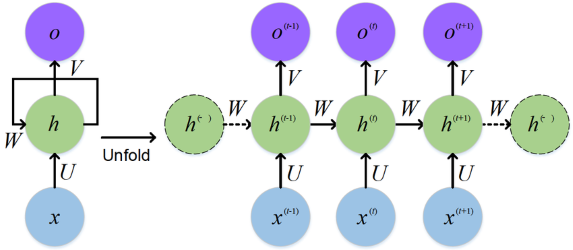

В базовом варианте `RNN` состоит из **набора последовательных ячеек**. Первая ячейка получает на вход первый элемент последовательности $x_1$, обрабатывает его и передаёт извлечённую информацию в следующую ячейку в виде некоторого набора чисел фиксированного размера. Этот набор называют **внутренним состоянием** $h$.

Затем этот процесс повторяется для второго элемента последовательности и второй ячейки и т. д. для элемента $x_t$ исследуемой последовательности. Внутренне состояние на шаге $t$ обозначают $h_t$.

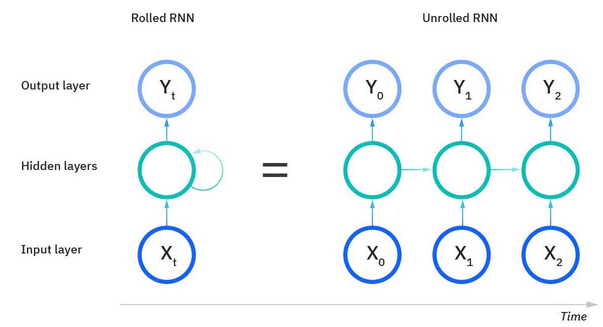

Каждая ячейка сети под индексом $t$ способна дополнительно **возвращать** значение $y_t$. Это полезно, когда необходимо конвертировать имеющуюся последовательность в новую.



###Устройство ячейки RNN

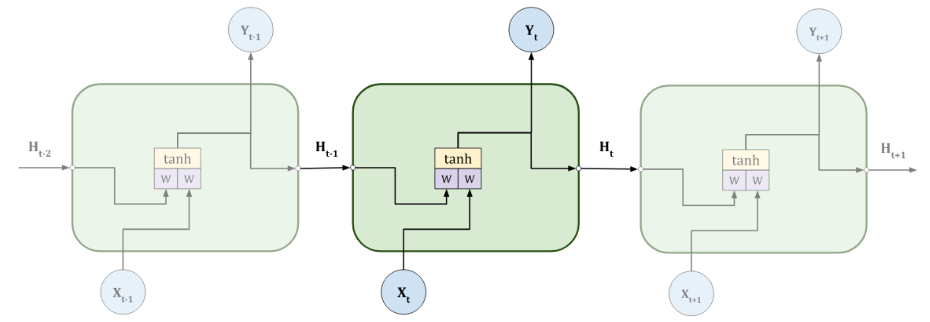

Выше представлено **внутреннее** устройство ячейки. Преобразования данных в ячейке состоят в том, что входящие в неё значения $x_t$ из $t$-й позиции последовательности и $h_{t-1}$ из ячейки под номером $({t-1})$ сначала умножаются на **веса** $w$, а затем передаются в функцию **активации**, обычно это $Tanh$. С учётом сдвига:

$$h_t = \tanh\left(\sum_{i=1}^n w_{hi} \cdot h_{t-1} + \sum_{j=1}^m w_{xj} \cdot x_t + b\right)$$

Аналогично считается **выход** $y_t$:

$$y_t = \sum_{k=1}^p w_{yk} \cdot h_t + b_y$$

###Ограничения RNN

Однако такой подход, когда имеется лишь одно скрытое состояние, приводит нас к проблеме, что сеть со временем **забывает** признаки, извлечённые на предыдущих шагах, а градиенты затухают. Поэтому были предложены более сложные архитектуры.

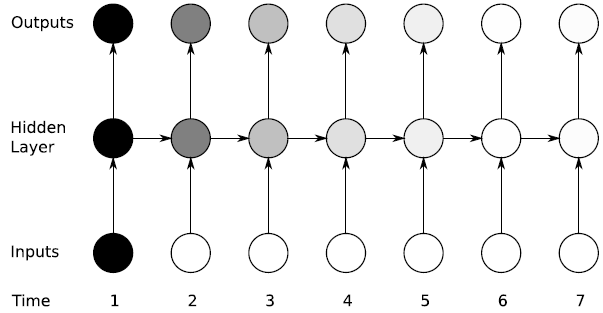

## Долгосрочная и короткосрочная память. LSTM

**LSTM** $(Long\ Short-Term\ Memory)$ архитектура включает дополнительное **внутреннее состояние ячейки** $c_t$, предназначенное для хранения информации на длительном горизонте. Внутри блока находятся три управляющих **вентиля** ($gate$). Каждый вентиль поэлементно выдаёт коэффициенты в диапазоне от $0$ до $1$, то есть выбирает, пропускать сигнал или нет. Вентили контролируют поток информации через ячейку.

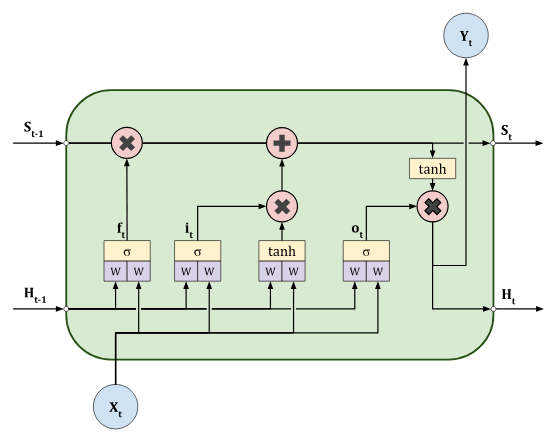

Каждый вентиль имеет своё название. Вентиль **забывания** $f_t$ $(forget\ gate)$ решает, какие части старой памяти сохранить. Для каждого $k$-го компонента:

$$f_{t,k} = \sigma\left(\sum_{i=1}^n w^{(f)}_{k,i} h_{t-1,i} + \sum_{j=1}^m u^{(f)}_{k,j} x_{t,j} + b^{(f)}_k\right)$$

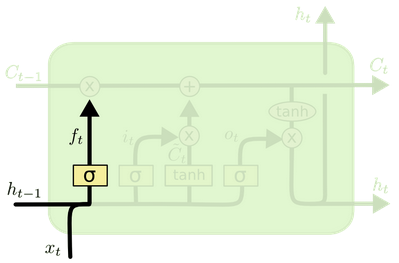

Вентиль **входа** $i_t$ $(unput\ gate)$  решает, какую новую информацию добавить в память:

$$i_{t,k} = \sigma\left(\sum_{i=1}^n w^{(i)}_{k,i} h_{t-1,i} + \sum_{j=1}^m u^{(i)}_{k,j} x_{t,j} + b^{(i)}_k\right)$$

Формируется кандидатная информация $\tilde c_t$:

$$\tilde c_{t,k} = \tanh\left(\sum_{i=1}^n w^{(c)}_{k,i} h_{t-1,i} + \sum_{j=1}^m u^{(c)}_{k,j} x_{t,j} + b^{(c)}_k\right)$$

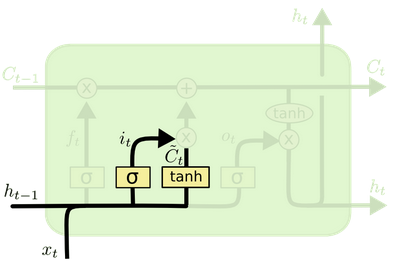

Память обновляется по правилу:

$$c_{t,k} = f_{t,k}\cdot c_{t-1,k} + i_{t,k}\cdot \tilde c_{t,k}$$

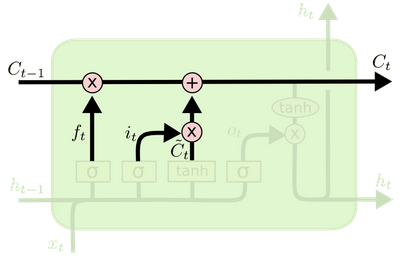

Вентиль **выхода** $o_t$ $(output\ gate)$ решает, какую часть памяти отдать наружу:

$$o_{t,k} = \sigma\left(\sum_{i=1}^n w^{(o)}_{k,i} h_{t-1,i} + \sum_{j=1}^m u^{(o)}_{k,j} x_{t,j} + b^{(o)}_k\right)$$

Вентиль выхода формирует скрытое состояние:

$$h_{t,k} = o_{t,k}\cdot \tanh(c_{t,k})$$

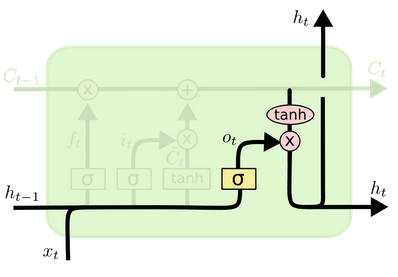

Поэлементные коэффициенты позволяют избирательно сохранять или стирать компоненты памяти. При $f_{t,k}$, близком к единице, соответствующий компонент памяти долго сохраняется. Это снижает проблему затухающих градиентов и даёт способность учить **длинные зависимости**.

##Многослойный LSTM

Можно добавить **несколько слоёв** `LSTM`, для каждого из которых $x_t$ будут представлять собой $y_t$ предыдущих.

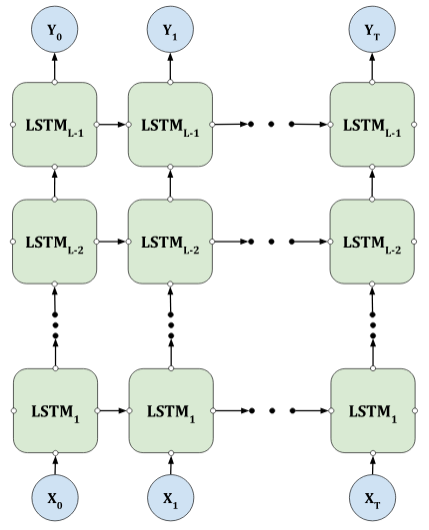

## GRU

**GRU** $(Gated\ Recurrent\ Unit)$ сокращает архитектуру `LSTM` и использует два вентиля. В `GRU` отсутствует отдельное состояние `cell state`.

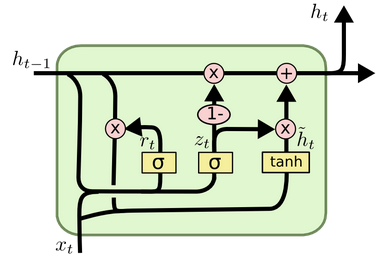

Для каждого компонента $k$ **обновляющий** ($update$) вентиль $z_t$ решает, сколько старого состояния сохранить:

$$z_{t,k} = \sigma\left(\sum_{i=1}^n w^{(z)}_{k,i} h_{t-1,i} + \sum_{j=1}^m u^{(z)}_{k,j} x_{t,j} + b^{(z)}_k\right)$$

**Сбросовый** ($reset$) вентиль $r_t$ решает, сколько прошлой информации сбросить перед формированием кандидата:

$$r_{t,k} = \sigma\left(\sum_{i=1}^n w^{(r)}_{k,i} h_{t-1,i} + \sum_{j=1}^m u^{(r)}_{k,j} x_{t,j} + b^{(r)}_k\right)$$

Кандидатное состояние вычисляется с учётом `reset`, так что в сумме участвуют поэлементно модифицированные предыдущие компоненты:

$$\tilde h_{t,k} = \tanh\left(\sum_{i=1}^n w^{(h)}_{k,i} \left(r_{t,i} \cdot h_{t-1,i}\right) + \sum_{j=1}^m u^{(h)}_{k,j} x_{t,j} + b^{(h)}_k\right)$$

**Итоговое** обновление каждого компонента:

$$h_{t,k} = \left(1 - z_{t,k}\right) \cdot h_{t-1,k} + z_{t,k} \cdot \tilde h_{t,k}$$


**Преимущества** `GRU` в том, что такая архитектура обычно содержит меньше параметров, чем `LSTM`, и обучается быстрее. Во многих практических задачах качество сравнимо с `LSTM`, поэтому `GRU` часто выбирают при ограниченных ресурсах.

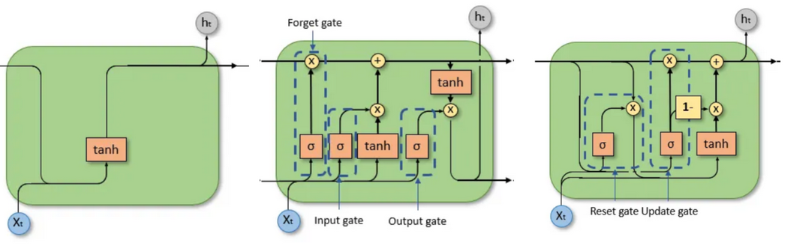

##Bidirectional RNN

**Стандартная RNN** учитывает только предшествующий контекст. Для задач, где имеет значение как левый, так и правый контекст, используется **двунаправленная сеть**. В ней параллельно работают две `RNN`: одна, читающая слева направо, и вторая, читающая справа налево. На каждом шаге выходы объединяются поэлементно суммой или конкатенацией.

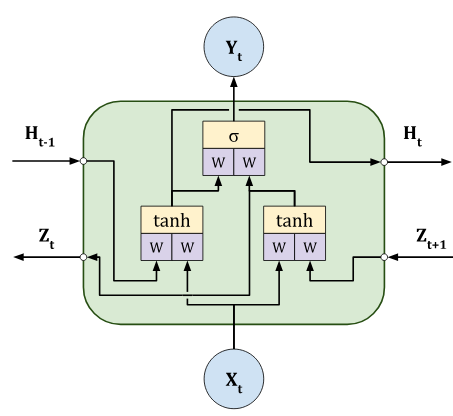

**Прямая** сеть даёт для каждого компонента $k$ скрытое состояние:

$$
h^{\rightarrow}_{t,k} = \tanh\left(\sum_{i=1}^n w^{\rightarrow}_{k,i} h^{\rightarrow}_{t-1,i} + \sum_{j=1}^m u^{\rightarrow}_{k,j} x_{t,j} + b^{\rightarrow}_k\right)
$$

**Обратная** сеть идёт по времени в обратном порядке и даёт:

$$
h^{\leftarrow}_{t,k} = \tanh\left(\sum_{i=1}^n w^{\leftarrow}_{k,i} h^{\leftarrow}_{t+1,i} + \sum_{j=1}^m u^{\leftarrow}_{k,j} x_{t,j} + b^{\leftarrow}_k\right)
$$

**Итоговое** представление на позиции $t$ получают объединением двух направлений, например через сумму:
$$
h_{t,k} = h^{\rightarrow}_{t,k} + h^{\leftarrow}_{t,k}
$$

Двунаправленные сети **эффективны**, если весь вход доступен заранее. Они повышают качество для задач разметки и анализа предложений. Для задач генерации в реальном времени двунаправленные сети неприменимы, потому что требуется знать будущее состояние последовательности заранее.

## Пример. Предсказание цен на акции

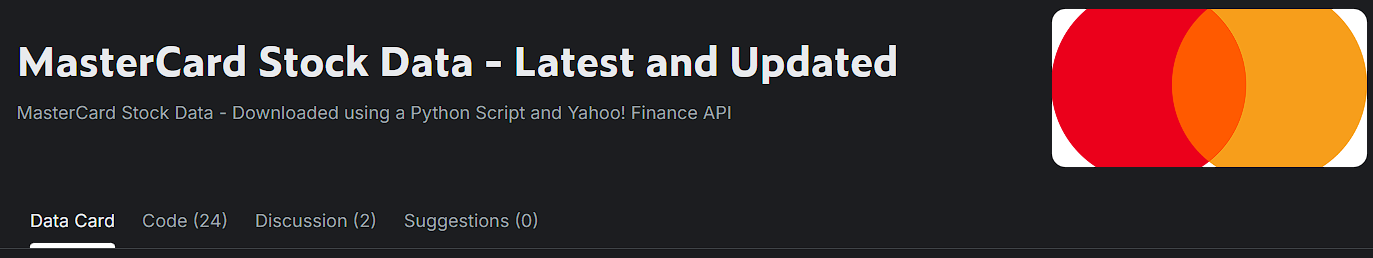

На [Kaggle](https://www.kaggle.com/datasets/kalilurrahman/mastercard-stock-data-latest-and-updated?select=Mastercard_stock_history.csv) имеется датасет с динамикой цен на акции компании MasterCard за период с 25 мая 2006 года по 11 октября 2021 года. Обучим описанные выше рекурентные модели для предсказания цен на акции в заданный день на основе данных за предыдущие 60 дней.

###Сбор и подготовка данных

Установим библиотеку для скачивания датасета

In [1]:
!pip install -q opendatasets

Сохраним токен Kaggle в необходимой для opendatasets директории.

In [2]:
from google.colab import files
import os

uploaded = files.upload()

Saving kaggle.json to kaggle.json


Скачаем датасет.

In [3]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/kalilurrahman/mastercard-stock-data-latest-and-updated'
od.download(url)

Dataset URL: https://www.kaggle.com/datasets/kalilurrahman/mastercard-stock-data-latest-and-updated


100%|██████████| 195k/195k [00:00<00:00, 586MB/s]

Датасет содержит две папки. В `Images` изображения `JPG` разного размера, в `labels` — файлы с `bbox` в формате `TXT`.

In [8]:
from pathlib import Path

DIR = Path('./mastercard-stock-data-latest-and-updated')
os.listdir(DIR)

['Mastercard_stock_spilts.csv',
 'Mastercard_stock_action.csv',
 'Mastercard_stock_dividends.csv',
 'Mastercard_stock_history.csv',
 'Mastercard_stock_info.csv']

In [61]:
import pandas as pd

data = pd.read_csv(DIR / "Mastercard_stock_history.csv", parse_dates=["Date"], index_col="Date")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25 00:00:00-04:00,3.677800,4.202548,3.668674,4.197985,395343000,0.0,0.0
2006-05-26 00:00:00-04:00,4.225363,4.265517,4.025502,4.100336,103044000,0.0,0.0
2006-05-30 00:00:00-04:00,4.103990,4.104902,3.910517,4.015467,49898000,0.0,0.0
2006-05-31 00:00:00-04:00,4.047406,4.139579,4.047406,4.101250,30002000,0.0,0.0
2006-06-01 00:00:00-04:00,4.100334,4.389630,4.097596,4.335786,62344000,0.0,0.0


Имеем 4733 временных значения, это дни в течение 15 лет.

In [62]:
data.shape

(4733, 7)

In [63]:
data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [13]:
series = data["High"].ffill().values.astype("float32")

Масштабирование и генерация последовательностей.

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series.reshape(-1,1)).squeeze()


def make_sequences(x, seq_len):
    X, y = [], []
    for i in range(len(x)-seq_len):
        X.append(x[i:i+seq_len])
        y.append(x[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 60
X, y = make_sequences(series_scaled, seq_len)

Сделаем `hold-out` в соотношении `80/20`. Будем использовать первые $80%$ временных рядов для обучения, а последние $20\%$ предсказывать.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

Соберём датасеты и загрузчики.

In [24]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(torch.tensor(X_train).unsqueeze(-1), torch.tensor(y_train))
val_ds = TensorDataset(torch.tensor(X_val).unsqueeze(-1), torch.tensor(y_val))

batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

Выведем примеры данных для предсказания.

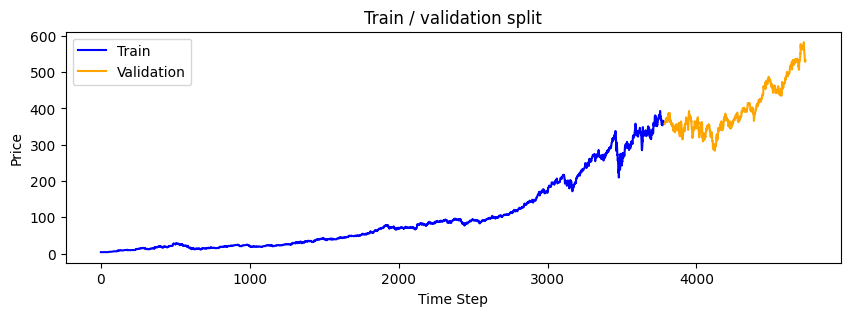

In [28]:
import matplotlib.pyplot as plt

series_inv = scaler.inverse_transform(series_scaled.reshape(-1,1)).squeeze()
split_idx = int(len(series_inv) * 0.8)

plt.figure(figsize=(10,3))
plt.plot(range(split_idx), series_inv[:split_idx], color='blue', label='Train')
plt.plot(range(split_idx, len(series_inv)), series_inv[split_idx:], color='orange', label='Validation')
plt.title("Train / validation split")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.show()

###Моделирование

Универсальная функция создания модели `RNN`, `LSTM`, `GRU`. Модель читает последовательность и выдаёт скалярный прогноз.

In [18]:
import torch.nn as nn

def build_model(kind, input_size, hidden_size, num_layers=1, bidirectional=False):
    if kind == "RNN":
        r = nn.RNN(input_size, hidden_size, num_layers=num_layers, batch_first=True, nonlinearity="tanh", bidirectional=bidirectional)
    elif kind == "LSTM":
        r = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)
    elif kind == "GRU":
        r = nn.GRU(input_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)
    net = nn.Sequential(
        r,
        nn.Flatten(start_dim=1),
        nn.Linear(hidden_size * (2 if bidirectional else 1) * seq_len, 1)
    )
    return net

Функция обучения.

In [45]:
import torch.optim as optim
from tqdm.auto import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def train_model(model, epochs=10, lr=1e-3):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in tqdm(range(epochs)):
        model.train()
        total = 0.0
        count = 0
        for xb, yb in train_loader:
            xb = xb.to(device).float()
            yb = yb.to(device).float().unsqueeze(1)
            optimizer.zero_grad()
            out = model[0](xb)[0] if isinstance(model[0], nn.RNNBase) else model(xb)
            if isinstance(out, tuple):
                out = out[0]
            out_flat = out.reshape(out.size(0), -1)
            pred = model[1:](out_flat)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()
            total += loss.item() * xb.size(0)
            count += xb.size(0)
        val_loss = 0.0
        vcount = 0

        model.eval()
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device).float()
                yb = yb.to(device).float().unsqueeze(1)
                out = model[0](xb)[0] if isinstance(model[0], nn.RNNBase) else model(xb)
                if isinstance(out, tuple):
                    out = out[0]
                out_flat = out.reshape(out.size(0), -1)
                pred = model[1:](out_flat)
                val_loss += nn.MSELoss()(pred, yb).item() * xb.size(0)
                vcount += xb.size(0)
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch + 1}: train_loss = {total / count:.6f}, val_loss = {val_loss / vcount:.6f}")


    return model

Создадим и обучим три модели `RNN`, `LSTM`, `GRU` и одну двунаправленную `LSTM` для сравнения.

In [ ]:
hidden = 32
models = {}
models["RNN"] = build_model("RNN", 1, hidden)
models["LSTM"] = build_model("LSTM", 1, hidden)
models["GRU"] = build_model("GRU", 1, hidden)
models["BiLSTM"] = build_model("LSTM", 1, hidden, bidirectional=True)

Первые 50 эпох обучаем с $lr=10^{-3}$, затем $10^{-4}$.

In [51]:
for name, m in models.items():
    print("Training", name)
    models[name] = train_model(m, epochs=50, lr=1e-4)

Training RNN


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1: train_loss = 0.000046, val_loss = 0.000242
Epoch 5: train_loss = 0.000044, val_loss = 0.000234
Epoch 10: train_loss = 0.000047, val_loss = 0.000229
Epoch 15: train_loss = 0.000044, val_loss = 0.000221
Epoch 20: train_loss = 0.000049, val_loss = 0.000251
Epoch 25: train_loss = 0.000042, val_loss = 0.000307
Epoch 30: train_loss = 0.000039, val_loss = 0.000237
Epoch 35: train_loss = 0.000041, val_loss = 0.000204
Epoch 40: train_loss = 0.000037, val_loss = 0.000213
Epoch 45: train_loss = 0.000039, val_loss = 0.000289
Epoch 50: train_loss = 0.000037, val_loss = 0.000202
Training LSTM


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1: train_loss = 0.000060, val_loss = 0.000319
Epoch 5: train_loss = 0.000058, val_loss = 0.000319
Epoch 10: train_loss = 0.000055, val_loss = 0.000311
Epoch 15: train_loss = 0.000056, val_loss = 0.000303
Epoch 20: train_loss = 0.000054, val_loss = 0.000304
Epoch 25: train_loss = 0.000052, val_loss = 0.000293
Epoch 30: train_loss = 0.000052, val_loss = 0.000296
Epoch 35: train_loss = 0.000052, val_loss = 0.000365
Epoch 40: train_loss = 0.000052, val_loss = 0.000289
Epoch 45: train_loss = 0.000053, val_loss = 0.000296
Epoch 50: train_loss = 0.000052, val_loss = 0.000276
Training GRU


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1: train_loss = 0.000044, val_loss = 0.000222
Epoch 5: train_loss = 0.000041, val_loss = 0.000222
Epoch 10: train_loss = 0.000040, val_loss = 0.000265
Epoch 15: train_loss = 0.000039, val_loss = 0.000227
Epoch 20: train_loss = 0.000039, val_loss = 0.000205
Epoch 25: train_loss = 0.000038, val_loss = 0.000202
Epoch 30: train_loss = 0.000039, val_loss = 0.000227
Epoch 35: train_loss = 0.000035, val_loss = 0.000220
Epoch 40: train_loss = 0.000035, val_loss = 0.000184
Epoch 45: train_loss = 0.000034, val_loss = 0.000184
Epoch 50: train_loss = 0.000034, val_loss = 0.000175
Training BiLSTM


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1: train_loss = 0.000057, val_loss = 0.000311
Epoch 5: train_loss = 0.000044, val_loss = 0.000293
Epoch 10: train_loss = 0.000046, val_loss = 0.000268
Epoch 15: train_loss = 0.000044, val_loss = 0.000266
Epoch 20: train_loss = 0.000042, val_loss = 0.000283
Epoch 25: train_loss = 0.000038, val_loss = 0.000254
Epoch 30: train_loss = 0.000040, val_loss = 0.000349
Epoch 35: train_loss = 0.000039, val_loss = 0.000303
Epoch 40: train_loss = 0.000046, val_loss = 0.000434
Epoch 45: train_loss = 0.000037, val_loss = 0.000261
Epoch 50: train_loss = 0.000044, val_loss = 0.000442


###Анализ результатов

Оценим ошибку. Функция предсказания.

In [52]:
import numpy as np

def predict(model, X_arr):
    model.eval()
    with torch.no_grad():
        xb = torch.tensor(X_arr).unsqueeze(-1).to(device).float()
        out = model[0](xb)[0] if isinstance(model[0], nn.RNNBase) else model(xb)
        if isinstance(out, tuple):
            out = out[0]
        out_flat = out.reshape(out.size(0), -1)
        pred = model[1:](out_flat).cpu().numpy().squeeze()
    return pred

Оценка по `RMSE`. Для всех моделей получаем ошибки около 10. В зависимости от инициализации и изменения весов на последней эпохи, модели дают ошибку не менее 7 и не более 15.

In [53]:
from sklearn.metrics import mean_squared_error

for name, m in models.items():
    p = predict(m, X_val)
    p_inv = scaler.inverse_transform(p.reshape(-1,1)).squeeze()
    y_inv = scaler.inverse_transform(y_val.reshape(-1,1)).squeeze()
    rmse = np.sqrt(mean_squared_error(y_inv, p_inv))
    print(name, "RMSE", rmse)

RNN RMSE 8.223405455030903
LSTM RMSE 9.604494918101416
GRU RMSE 7.640011628226973
BiLSTM RMSE 12.154195656064552


Выведем результаты предсказаний для временного ряда, который мы рассматривали выше.

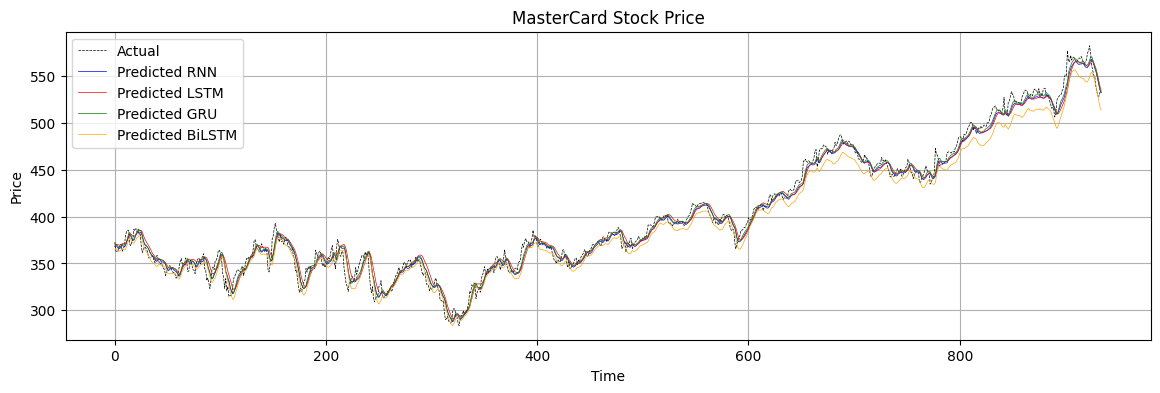

In [56]:
y_val_inv = scaler.inverse_transform(y_val.reshape(-1,1)).squeeze()

plt.figure(figsize=(14, 4))
plt.plot(y_val_inv, color='black', label='Actual', ls='--', linewidth=0.5)
colors = {"RNN": "blue", "LSTM": "red", "GRU": "green", "BiLSTM": "orange"}

for name, model in models.items():
    pred = predict(model, X_val)
    pred_inv = scaler.inverse_transform(pred.reshape(-1,1)).squeeze()
    plt.plot(pred_inv, color=colors[name], label=f'Predicted {name}', alpha=1, linewidth=0.5)

plt.title("MasterCard Stock Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

##Выводы

В ходе занятия мы:

1. Познакомились с задачей анализа последовательных данных.
2. Рассмотрели классическую архитектуру `RNN`.
3. Изучили `LSTM` механизм.
4. Исследовали `GRU`.
5. Определили особенности `Bidirectional RNN`.
6. Решили пример предсказания цен на акции MasterCard с использованием описанных выше четырёх архитектур.

##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Быстрицкий, В. RNN, LSTM, GRU и другие рекуррентные нейронные сети. — Текст : электронный. / Владимир Быстрицкий // Записная книжка : [сайт]. — 2021. — 10 мая. — URL: http://vbystricky.ru/2021/05/rnn_lstm_gru_etc.html (дата обращения: 01.11.2025).
2. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный. / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
3. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.
4. Янина, А. Нейросети для работы с последовательностями. – Текст : электронный. / Анастасия Янина ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/nejroseti-dlya-raboty-s-posledovatelnostyami (дата обращения: 01.11.2025).
5. Awan, A. A. Recurrent Neural Network Tutorial (RNN) / Abid Ali Awan. — Текст : электронный // DataCamp : [сайт]. — 2022. — 16 March. — URL: https://www.datacamp.com/tutorial/tutorial-for-recurrent-neural-network (дата обращения: 01.11.2025).
6. Olah, C. Understanding LSTM Networks / Christopher Olah. — Текст : электронный // colah's blog : [сайт]. — 2015. — 27 August. — URL: https://colah.github.io/posts/2015-08-Understanding-LSTMs/ (дата обращения: 01.11.2025).


